In [1]:
import pandas as pd


In [7]:
d = pd.read_csv("pooled-data2.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              236 non-null    int64  
 1   FilePath           236 non-null    object 
 2   Found in           236 non-null    int64  
 3   % snippet in diff  236 non-null    float64
 4   pre_LCOM           235 non-null    float64
 5   post_LCOM          235 non-null    float64
 6   latest_LCOM        235 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 13.0+ KB


In [11]:
improved = 0
gone_down = 0
same = 0
same_abv5 = 0
same_blw5 = 0
gone_down_abv5 = 0
gone_down_blw5 = 0
improved_abv5 = 0
improved_blw5 = 0

worse = d[d['pre_LCOM']<d['post_LCOM']]
for index, row in d.iterrows():
    if row['pre_LCOM'] == row['post_LCOM']:
        same += 1
        #same_list.append((index,row["% snippet in diff"]))
        if row["% snippet in diff"] > 0.5:
            same_abv5 += 1
        else:
            same_blw5 += 1
    elif row['pre_LCOM'] > row['post_LCOM']:
        improved +=1
        if row["% snippet in diff"] > 0.5:
            improved_abv5 += 1
        else:
            improved_blw5 += 1
                         
    elif row['pre_LCOM'] < row['post_LCOM']:
        
        gone_down +=1
        if row["% snippet in diff"] > 0.5:
            gone_down_abv5 += 1
        else:
            gone_down_blw5 += 1
                         
print("improved = ", improved)
print("gone_down = ", gone_down)
print("same = ", same)
print("same abv ",same_abv5)
print("same blw ",same_blw5)
print("gone down abv ",gone_down_abv5)
print("gone down blw ",gone_down_blw5)
print("improved abv ",improved_abv5)
print("improved blw ",improved_blw5)


improved =  40
gone_down =  51
same =  144
same abv  61
same blw  83
gone down abv  6
gone down blw  45
improved abv  0
improved blw  40


In [14]:
len(worse)

51

In [18]:
# partrecovered = worse[worse['pre_LCOM']<worse['latest_LCOM'] and worse['latest_LCOM']<worse['post_LCOM']]
notrecov = worse[worse['post_LCOM']<worse['latest_LCOM']]
recov = worse[worse['pre_LCOM']>=worse['latest_LCOM']]
print(len(notrecov))
print(len(recov))

19
11


In [21]:
ds1 = set([tuple(line) for line in worse.values])
ds2 = set([tuple(line) for line in notrecov.values])
ds3 = set([tuple(line) for line in recov.values])

In [22]:
dd1 = ds1.difference(ds2)
dd2 = dd1.difference(ds3)
partiallyrecov= pd.DataFrame(list(dd2))
partiallyrecov

,0,1,2,3,4,5,6
0,90,final/hlmng/hlmng-src-testing-RestTest,16,0.065661,0.000000,0.461538,0.428571
1,61,file-data/go-jay/app-src-main-java-ai-agusibra...,3,0.168226,0.275000,0.300000,0.279070
2,42,file-data/appcommons/app-src-main-java-com-ben...,3,0.069994,0.428571,0.529412,0.500000
3,13,final/ColorSetter/src-Apercu,5,0.128934,0.000000,0.666667,0.666667
4,117,final/rico/avro-src-main-java-com-quantiply-av...,4,0.451822,0.666667,0.800000,0.714286
5,20,file-data/OlomouckyBazen/app-src-main-java-cz-...,8,0.195930,0.600000,0.615385,0.615385
6,45,final/PRECISE/src-precise_repl-Tokenizer,5,0.220996,0.500000,0.538462,0.538462
7,82,file-data/remoting/src-main-java-hudson-remoti...,5,0.247215,0.181818,0.214286,0.200000
8,6,final/Android_Pebble_SD/app-src-main-java-uk-o...,19,0.152687,0.000000,0.250000,0.103448
9,101,final/lti_starter/src-main-java-ltistarter-App...,15,0.605659,0.615385,0.666667,0.666667


In [25]:
len(partiallyrecov)

21

In [27]:
recov_above = len(recov[recov['% snippet in diff']>0.5])
recov_above

0

In [28]:
notrecov_above = len(notrecov[notrecov['% snippet in diff']>0.5])
notrecov_above

4

In [31]:
partiallyrecov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     int64  
 1   1       21 non-null     object 
 2   2       21 non-null     int64  
 3   3       21 non-null     float64
 4   4       21 non-null     float64
 5   5       21 non-null     float64
 6   6       21 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [32]:
partiallyrecov_above = len(partiallyrecov[partiallyrecov[3]>0.5])
partiallyrecov_above

2

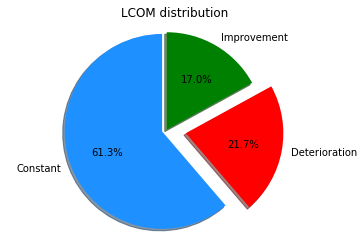

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Constant', 'Deterioration', 'Improvement'
sizes = [same,  gone_down,improved]
explode = (0.05, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = ['dodgerblue','r','g'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('LCOM distribution')
plt.show()

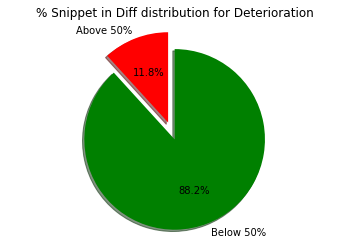

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Above 50%', 'Below 50%'
sizes = [gone_down_abv5, gone_down_blw5]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = ['r','g'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% Snippet in Diff distribution for Deterioration')
plt.show()

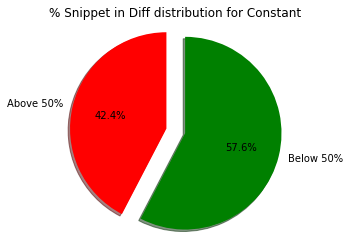

In [52]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Above 50%', 'Below 50%'
sizes = [same_abv5, same_blw5]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = ['r','g'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% Snippet in Diff distribution for Constant')
plt.show()

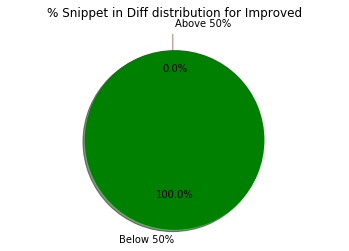

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Above 50%', 'Below 50%'
sizes = [improved_abv5, improved_blw5]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = ['r','g'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% Snippet in Diff distribution for Improved')
plt.show()

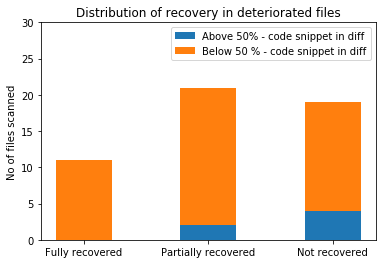

In [63]:
import numpy as np
N = 3
above50 = (recov_above, partiallyrecov_above, notrecov_above)
below50 = (len(recov)-recov_above, len(partiallyrecov)-partiallyrecov_above, len(notrecov)-notrecov_above)
ind = np.arange(N)    # the x locations for the groups
width = 0.45       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, above50, width)
p2 = plt.bar(ind, below50, width,
             bottom=above50)

plt.ylabel('No of files scanned')
plt.title('Distribution of recovery in deteriorated files')
plt.xticks(ind, ('Fully recovered', 'Partially recovered', 'Not recovered'))
plt.yticks(np.arange(0, 35, 5))
plt.legend((p1[0], p2[0]), ('Above 50% - code snippet in diff', 'Below 50 % - code snippet in diff'))

plt.show()